In [1]:
# '''create new ipython kernel if needed'''
# !python -m ipykernel install --user --name=axonenv
'''check python interpreter path'''
import sys
print(sys.executable)
sys.path.append('/home/adam/MEA_Analysis/AxonReconPipeline')

/home/adam/miniconda3/envs/axonenv/bin/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem, ttest_ind
import statsmodels.stats.multitest as mt
import logging
import ast
import pingouin as pg

color_map = {'WT': '#0000FF',   #blue
             'HET': '#FF0000',  #red
             'HOM': '#FFA500'   #orange
             }

# Logging setup
#reset logger
import logging
logger = logging.getLogger(__name__)  # Create a logger
logger.setLevel(logging.DEBUG)
stream_handler = logging.StreamHandler()  # Create handlers, logs to console
#stream_handler.setLevel(logging.DEBUG)  # Set level of handlers
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s - %(module)s.%(funcName)s')
stream_handler.setFormatter(formatter)
logger.addHandler(stream_handler)  # Add handlers to the logger

In [3]:
import pandas as pd
import os

# Define the root path
root_path = '/home/adam/workspace/MEA_Analysis_fork/AxonReconPipeline/data_csvs/reconstructions_KCNT1_T3_C1_03122024'

'''get current working directory, change it to project root directory'''
os.getcwd()
os.chdir('/home/adam/workspace/MEA_Analysis_fork/AxonReconPipeline')

# Last Updated 5Aug2024, sg",
# Load the uploaded files into dataframes
# TODO: T5 doesnt have any axontracking, but T6 does and will.
files_dict = {
    "DIV10": {
        "T3": { 
            #one recording missing, well 3
            "files": [
                (os.path.join(root_path, '240322_M07037_000025_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240322_M07037_000025_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240322_M07037_000025_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240322_M07037_000025_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240322_M07037_000025_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV13": {
        "T3": {
            "files": [
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well003_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV16": {
        "T3": {
            "files": [
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well003_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV21": {
        "T3": {
            #TODO: Note why there are missing data here.
            "files": [
                (os.path.join(root_path, '240402_M07037_000065_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240402_M07037_000065_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240402_M07037_000065_AxonTracking_well003_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240402_M07037_000065_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240402_M07037_000065_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV24": {
        "T3": {
            #TODO: Note why there are missing data here.
            "files": [
                (os.path.join(root_path, '240405_M07037_000077_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240405_M07037_000077_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240405_M07037_000077_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240405_M07037_000077_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240405_M07037_000077_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV28": {
        "T3": {
            #TODO: Note why there are missing data here.
            "files": [
                (os.path.join(root_path, '240409_M07037_000095_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240409_M07037_000095_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240409_M07037_000095_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240409_M07037_000095_AxonTracking_well003_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240409_M07037_000095_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV31": {
        "T3": {
            #TODO: Note why there are missing data here.
            "files": [
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well003_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    }
}

In [4]:

file_paths = []
categories = []
divs = []

for div, div_data in files_dict.items():
    for t, t_data in div_data.items():
        for file_path, category in t_data["files"]:
            file_paths.append(file_path)
            categories.append(category)
            divs.append(int(div[3:]))  # Extract the DIV number

# Verify files exist
for file in file_paths:
    try:
        assert os.path.exists(file), f"File {file} does not exist"
    except Exception as e:
        print(e)
        pass

try: assert len(categories) == len(divs) == len(categories), "Length of categories and DIVs must be equal to the number of files"
except AssertionError as e: 
    print(e)
    print(len(categories), len(divs), len(file_paths))

#Modify lists to exclude data based on position in categories
#categories = [categories[i] for i in range(len(categories)) if categories[i] != 'HOM']
#categories = [categories[i] for i in range(len(categories)) if categories[i] != 'HET']
#categories = [categories[i] for i in range(len(categories)) if categories[i] != 'WT']

In [5]:
'''Analyze and Treat Data'''
def load_data(file_paths, categories, divs):
    """Load data from CSV files and append category and DIV information."""
    data = []
    for file_path, category, div in zip(file_paths, categories, divs):
        df = pd.read_csv(file_path)
        df.insert(0, 'category', category) #Insert category column at position 0
        df.insert(1, 'DIV', div)
        df = df.to_dict()
        #eval all lists in the dataframe
        for key, value in df.items(): 
            #if isinstance(value, str):
                #df[key] = [eval(val) for val in value]
            #if isinstance(value, dict):
            check = True
            try: eval(df[key][0]) #check if eval works
            except: check = False
            if check: df[key] = [eval(val) for val in value.values() if isinstance(val, str) and val.startswith('[')]
        data.append(df)
    return data

def count_units_and_branches(data, verbose=False):
    """Count units and branches grouped by DIV and Category."""
    #Old method:
    # unit_count = 0
    # branch_count = 0
    # for df in data:
    #     required_columns = ['DIV', 'Category', 'unit_ids', 'branch_id']
    #     if not all(column in df.columns for column in required_columns):
    #         raise ValueError(f"Data must contain the following columns: {required_columns}")
    
    #     unit_count += len(df['unit_ids'].index)
    #     branch_counts = [len(eval(branch_list)) for branch_list in df['branch_id']]
    #     branch_count += sum(branch_counts)

    #New method:
    tot_unit_count = 0
    tot_branch_count = 0
    for well in data:
        unit_count = len(well['unit_ids'])
        branch_count = [len(branch_list) for branch_list in well['branch_id']]
        branch_count = sum(branch_count)
        if verbose: print(f'DIV: {well["DIV"][0]}, Category: {well["category"][0]}, Units: {unit_count}, Branches: {branch_count}, Mean Branches per unit: {branch_count / unit_count}')

        # Update total counts
        tot_unit_count += unit_count
        tot_branch_count += branch_count    
    #print(f'Total units: {tot_unit_count}, Total branches: {tot_branch_count}')
    return tot_unit_count, tot_branch_count

def validate_template_densities(data, std=1, verbose=False, method='by_well'):
    """Validate and filter density data based on given criteria."""
    print('Validating templates...')
    print(f'Method: {method}')
    
    def get_density_threshold(density_values):
        density_values = pd.Series(density_values)
        
        # Calculate the mean and standard deviation
        mean_value = density_values.mean()
        std_dev = density_values.std()

        # Define the threshold as one standard deviation below the mean
        density_threshold = mean_value - std_dev*std
        return density_threshold
    
    def filter_data(data, density_values, threshold):
        """Filter data based on density threshold."""
        before_count = len(data["unit_ids"])
        valid_indices = [idx for idx, val in enumerate(density_values) if val >= threshold]
        valid_return = {key: [val[idx] for idx in valid_indices] for key, val in data.items()}
        after_count = len(valid_return["unit_ids"])
        if verbose: print(f'Before: {before_count} units, After: {after_count} units')
        return valid_return
    
    valid_data = data.copy()

    if method == 'by_well': #TODO: Update and implement if needed.
        raise NotImplementedError("Method 'by_well' is not implemented yet.")
        for i, well in enumerate(data):
            # Extract and evaluate 'channel_density'
            density_values = [d[0] for d in well['channel_density']]
            density_threshold = pd.Series(density_values).quantile(threshold)
            valid_data[i] = filter_data(well, density_values, density_threshold)
            if verbose: print(f'Well {i}, Density threshold: {density_threshold}')

    elif method == 'by_DIV':
        divs = set(well['DIV'][0] for well in data)
        for div in divs:
            div_data = [well for well in data if well['DIV'][0] == div]
            pre_unit_count, _ = count_units_and_branches(div_data, verbose=False)
            try: assert len(div_data) > 0, f"No data found for DIV {div}"
            except AssertionError as e: print(e); continue
            combined_density_values = [d[0] for well in div_data for d in well['channel_density']]
            combined_density_values.sort()
            density_threshold = get_density_threshold(combined_density_values)
            for i, well in enumerate(div_data):
                density_values = [d[0] for d in well['channel_density']]
                density_values.sort()
                valid_data[valid_data.index(well)] = filter_data(well, density_values, density_threshold)
            if verbose: 
                print(f'DIV {div}, Density threshold: {density_threshold}')
            div_data = [well for well in valid_data if well['DIV'][0] == div]
            post_unit_count, _ = count_units_and_branches(div_data, verbose=False)
            print(f'DIV {div}, Units before: {pre_unit_count}, Units after: {post_unit_count}')

    elif method == 'by_category': #TODO: Update and implement if needed.
        raise NotImplementedError("Method 'by_category' is not implemented yet.")
        categories = set(well['category'][0] for well in data)
        for category in categories:
            category_data = [well for well in data if well['category'][0] == category]
            try: assert len(category_data) > 0, f"No data found for category {category}"
            except AssertionError as e: print(e); continue
            combined_density_values = [d[0] for well in category_data for d in well['channel_density']]
            density_threshold = pd.Series(combined_density_values).quantile(threshold)
            for i, well in enumerate(category_data):
                density_values = [d[0] for d in well['channel_density']]
                valid_data[valid_data.index(well)] = filter_data(well, density_values, density_threshold)
            if verbose:
                print(f'Category {category}, Density threshold: {density_threshold}')

    elif method == 'global':
        combined_density_values = [d[0] for well in data for d in well['channel_density']]
        density_threshold = get_density_threshold(combined_density_values)
        for i, well in enumerate(data):
            density_values = [d[0] for d in well['channel_density']]
            valid_data[i] = filter_data(well, density_values, density_threshold)
        if verbose:
            print(f'Global density threshold: {density_threshold}')

    valid_units, valid_branches = count_units_and_branches(valid_data)
    #print('After density validation:')
    print(f'Total units: {valid_units}, Total branches: {valid_branches}')
    
    return valid_data

def validate_branch_lengths_data(data, min_length=0, stdevs=3, outlier_method='by_DIV', remove_outlier_data=False):
    """Validate and filter branch lengths data based on given criteria."""
    #Old method:
    # data_copy = data.copy()
    # total_units, total_branches = len(set(data_copy['unit_ids'])), len(data_copy['branch_id'])
    # print('Before branch length validation:')
    # print(f'Total units: {total_units}, Total branches: {total_branches}')
    
    # data_copy['length'] = data_copy['length'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    # valid_data = data_copy[data_copy['length'].apply(lambda x: x > 0)]
    # valid_data = valid_data[np.abs(valid_data['length'] - valid_data['length'].mean()) <= (stdevs * valid_data['length'].std())]

    # valid_units, valid_branches = len(set(valid_data['unit_ids'])), len(valid_data['branch_id'])
    # print('After branch length validation:')
    # print(f'Total units: {valid_units}, Total branches: {valid_branches}')

    #New method:
    print('Validating branch lengths...')
    def remove_short_branches(data, min_length):
        valid_data = data.copy()
        for i, well in enumerate(data):
            for unit_idx, branch_lengths in enumerate(well['length']):
                valid_lengths = []
                valid_branch_ids = []
                valid_velocities = []
                for j, branch_length in enumerate(branch_lengths):
                    if branch_length > min_length:
                        valid_lengths.append(branch_length)
                        valid_branch_ids.append(well['branch_id'][unit_idx][j])
                        valid_velocities.append(well['velocity'][unit_idx][j])
                valid_data[i]['length'][unit_idx] = valid_lengths
                valid_data[i]['branch_id'][unit_idx] = valid_branch_ids
                valid_data[i]['velocity'][unit_idx] = valid_velocities
        return valid_data

    def remove_outliers(data, stdevs, method='by_DIV'):
        def filter_data(well, branch_lengths, mean_length, std_length):
            valid_lengths = []
            valid_branch_ids = []
            valid_velocities = []
            for j, length in enumerate(branch_lengths):
                if np.abs(length - mean_length) <= stdevs * std_length:
                    valid_lengths.append(length)
                    valid_branch_ids.append(well['branch_id'][unit_idx][j])
                    valid_velocities.append(well['velocity'][unit_idx][j])
            return valid_lengths, valid_branch_ids, valid_velocities

        valid_data = data.copy()

        if method == 'by_DIV':
            divs = set(well['DIV'][0] for well in data)
            for div in divs:
                div_data = [well for well in data if well['DIV'][0] == div]
                _, pre_branch_count = count_units_and_branches(div_data)
                #print(f'DIV {div}: Before outlier removal: {pre_branch_count} branches')
                for well in div_data:
                    for unit_idx, branch_lengths in enumerate(well['length']):
                        mean_length = np.mean(branch_lengths)
                        std_length = np.std(branch_lengths)
                        valid_lengths, valid_branch_ids, valid_velocities = filter_data(well, branch_lengths, mean_length, std_length)
                        valid_data[valid_data.index(well)]['length'][unit_idx] = valid_lengths
                        valid_data[valid_data.index(well)]['branch_id'][unit_idx] = valid_branch_ids
                        valid_data[valid_data.index(well)]['velocity'][unit_idx] = valid_velocities
                div_data = [well for well in valid_data if well['DIV'][0] == div]
                _, post_branch_count = count_units_and_branches(div_data)
                #print(f'DIV {div}: After outlier removal: {post_branch_count} branches')
                print(f'DIV {div}: Before: {pre_branch_count} branches, After: {post_branch_count} branches')

        elif method == 'by_well':
            for i, well in enumerate(data):
                for unit_idx, branch_lengths in enumerate(well['length']):
                    mean_length = np.mean(branch_lengths)
                    std_length = np.std(branch_lengths)
                    valid_lengths, valid_branch_ids, valid_velocities = filter_data(well, branch_lengths, mean_length, std_length)
                    valid_data[i]['length'][unit_idx] = valid_lengths
                    valid_data[i]['branch_id'][unit_idx] = valid_branch_ids
                    valid_data[i]['velocity'][unit_idx] = valid_velocities

        return valid_data
    
    valid_data = data.copy()
    _, pre_branch_count = count_units_and_branches(valid_data)
    valid_data = remove_short_branches(valid_data, min_length)
    if remove_outlier_data: valid_data = remove_outliers(valid_data, stdevs, method=outlier_method)
    _, post_branch_count = count_units_and_branches(valid_data)
    print(f'Before: {pre_branch_count} branches, After: {post_branch_count} branches')   
    return valid_data

def validate_velocity_data(data, stdevs=3, outlier_method='by_DIV', remove_outlier_data=False):
    """Validate and filter velocity data based on given criteria."""
    print('Validating velocity data...')
    
    def remove_negative_velocities(data):
        valid_data = data.copy()
        for i, well in enumerate(data):
            for unit_idx, velocities in enumerate(well['velocity']):
                valid_velocities = []
                valid_branch_ids = []
                valid_lengths = []
                for j, velocity in enumerate(velocities):
                    if velocity >= 0:
                        valid_velocities.append(velocity)
                        valid_branch_ids.append(well['branch_id'][unit_idx][j])
                        valid_lengths.append(well['length'][unit_idx][j])
                valid_data[i]['velocity'][unit_idx] = valid_velocities
                valid_data[i]['branch_id'][unit_idx] = valid_branch_ids
                valid_data[i]['length'][unit_idx] = valid_lengths
        return valid_data

    def remove_outliers(data, stdevs, method='by_DIV'):
        def filter_data(well, velocities, mean_velocity, std_velocity):
            valid_velocities = []
            valid_branch_ids = []
            valid_lengths = []
            for j, velocity in enumerate(velocities):
                if np.abs(velocity - mean_velocity) <= stdevs * std_velocity:
                    valid_velocities.append(velocity)
                    valid_branch_ids.append(well['branch_id'][unit_idx][j])
                    valid_lengths.append(well['length'][unit_idx][j])
            return valid_velocities, valid_branch_ids, valid_lengths

        valid_data = data.copy()

        if method == 'by_DIV':
            divs = set(well['DIV'][0] for well in data)
            for div in divs:
                div_data = [well for well in data if well['DIV'][0] == div]
                _, pre_branch_count = count_units_and_branches(div_data)
                for well in div_data:
                    for unit_idx, velocities in enumerate(well['velocity']):
                        mean_velocity = np.mean(velocities)
                        std_velocity = np.std(velocities)
                        valid_velocities, valid_branch_ids, valid_lengths = filter_data(well, velocities, mean_velocity, std_velocity)
                        valid_data[valid_data.index(well)]['velocity'][unit_idx] = valid_velocities
                        valid_data[valid_data.index(well)]['branch_id'][unit_idx] = valid_branch_ids
                        valid_data[valid_data.index(well)]['length'][unit_idx] = valid_lengths
                div_data = [well for well in valid_data if well['DIV'][0] == div]
                _, post_branch_count = count_units_and_branches(div_data)
                print(f'DIV {div}: Before: {pre_branch_count} branches, After: {post_branch_count} branches')

        elif method == 'by_well':
            for i, well in enumerate(data):
                for unit_idx, velocities in enumerate(well['velocity']):
                    mean_velocity = np.mean(velocities)
                    std_velocity = np.std(velocities)
                    valid_velocities, valid_branch_ids, valid_lengths = filter_data(well, velocities, mean_velocity, std_velocity)
                    valid_data[i]['velocity'][unit_idx] = valid_velocities
                    valid_data[i]['branch_id'][unit_idx] = valid_branch_ids
                    valid_data[i]['length'][unit_idx] = valid_lengths

        return valid_data
    
    valid_data = data.copy()
    _, pre_branch_count = count_units_and_branches(valid_data)
    valid_data = remove_negative_velocities(valid_data)
    if remove_outlier_data:
        valid_data = remove_outliers(valid_data, stdevs, method=outlier_method)
    _, post_branch_count = count_units_and_branches(valid_data)
    print(f'Before: {pre_branch_count} branches, After: {post_branch_count} branches')   
    return valid_data

def validate_and_extract_branch_counts(data, verbose=False):
    """Validate and filter number of branches data based on given criteria."""
    print('Validating and extracting branch counts...')
    valid_data = data.copy()
    initial_unit_count, initial_branch_count = count_units_and_branches(valid_data)

    filtered_data = []
    for well in valid_data:
        unit_count = len(well['unit_ids'])
        branch_counts = [len(branch_list) for branch_list in well['branch_id']]
        
        if any(branch_counts):
            well['branch_counts'] = branch_counts
            filtered_data.append(well)

    final_unit_count, final_branch_count = count_units_and_branches(filtered_data)

    print(f'Before: {initial_unit_count} units, After: {final_unit_count} units')
    #print(f'Before: {initial_branch_count} branches, After: {final_branch_count} branches')
    
    return filtered_data

# Load data with the given categories and DIVs
data = load_data(file_paths, categories, divs)

#Count units and branches in data before any validation steps
verbose = False
unit_count, branch_count = count_units_and_branches(data, verbose=verbose)
print(f'Total units: {unit_count}, Total branches: {branch_count}')
print(f'Mean Number of branches per unit: {branch_count / unit_count}')

#validate templates
# I think doing this by DIV makes the most sense since we're comparing data at each DIV
verbose = False
valid_data = validate_template_densities(
    data, 
    std=1, #Arbitrary number. #TODO: Find a good threshold - allows for n standard deviation below the mean in channel density 
    verbose=verbose,
    method='by_DIV' #Options: 'by_well', 'by_DIV', 'by_category', 'global'
    )

#valdate branch lengths, velocities, and number of branches
valid_data = validate_branch_lengths_data(valid_data, stdevs=3, min_length=0, outlier_method='by_DIV', remove_outlier_data=False)
valid_data = validate_velocity_data(valid_data, stdevs=3, outlier_method='by_DIV', remove_outlier_data=False)
valid_data = validate_and_extract_branch_counts(valid_data)

# Print the number of units and branches after all validations
unit_count, branch_count = count_units_and_branches(valid_data, verbose=False)
print(f'Total units: {unit_count}, Total branches: {branch_count}')
print(f'Mean Number of branches per unit: {branch_count / unit_count}')
print(f'validation complete')

Total units: 3126, Total branches: 10005
Mean Number of branches per unit: 3.2005758157389637
Validating templates...
Method: by_DIV
DIV 10, Units before: 218, Units after: 164
DIV 13, Units before: 404, Units after: 298
DIV 16, Units before: 464, Units after: 354
DIV 21, Units before: 471, Units after: 366
DIV 24, Units before: 535, Units after: 405
DIV 28, Units before: 496, Units after: 392
DIV 31, Units before: 538, Units after: 430
Total units: 2409, Total branches: 7707
Validating branch lengths...
Before: 7707 branches, After: 7707 branches
Validating velocity data...
Before: 7707 branches, After: 7580 branches
Validating and extracting branch counts...
Before: 2409 units, After: 2409 units
Total units: 2409, Total branches: 7580
Mean Number of branches per unit: 3.146533831465338
validation complete


In [6]:
'''Explode Data, give each unit its own row'''
exploded_data = [pd.DataFrame(well) for well in valid_data]
exploded_data = [df.explode(['unit_ids','branch_counts']) for df in exploded_data]
exploded_data_by_unit = pd.concat(exploded_data, ignore_index=True)
print(len(exploded_data_by_unit)) #This should be the total number of branches
#print(exploded_data.head())
print('Unit Data exploded')

'''Explode Data, give each branch its own row'''
exploded_data = [pd.DataFrame(well) for well in valid_data]
exploded_data = [df.explode(['length','branch_id', 'velocity']) for df in exploded_data]
exploded_data_by_branch = pd.concat(exploded_data, ignore_index=True)
print(len(exploded_data_by_branch)) #This should be the total number of branches
#print(exploded_data.head())
print('Branch Data exploded')

2409
Unit Data exploded
7587
Branch Data exploded


/tmp/ipykernel_96069/3425063789.py:168: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[~df['outlier']], jitter=True, dodge=True, marker='o', alpha=0.6, palette=palette, edgecolor='gray')
/tmp/ipykernel_96069/3425063789.py:171: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette, alpha=0.6, errorbar='se',


Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.
ANOVA for DIV 31: F-statistic=4.35496773330547, p-value=0.01302323357787962
Comparing HET vs HOM at DIV 31: p-value=0.8918
Comparing HET vs WT at DIV 31: p-value=0.0109
Comparing HOM vs WT at DIV 31: p-value=0.0363
ANOVA for DIV 16: F-statistic=6.037668321221619, p-value=0.0024738833963859562
Comparing HET vs HOM at DIV 16: p-value=0.0132
Comparing HET vs WT at DIV 16: p-value=0.0079
Comparing HOM vs WT at DIV 16: p-value=0.996
ANOVA for DIV 10: F-statistic=0.49639580774732833, p-value=0.6090756403333425
ANOVA for DIV 28: F-statistic=7.227294123457105, p-value=0.000754008276849246
Comparing HET vs HOM at DIV 28: p-value=0.3733
Comparing HET vs WT at DIV 28: p-value=0.0004
Comparing HOM vs WT at DIV 28: p-value=0.0712
ANOVA for DIV 13: F-statistic=2.5468105570640542, p-value=0.07897492148931856
ANOVA for DIV 24: F-statistic=4.4060447062616435, p-value=0.

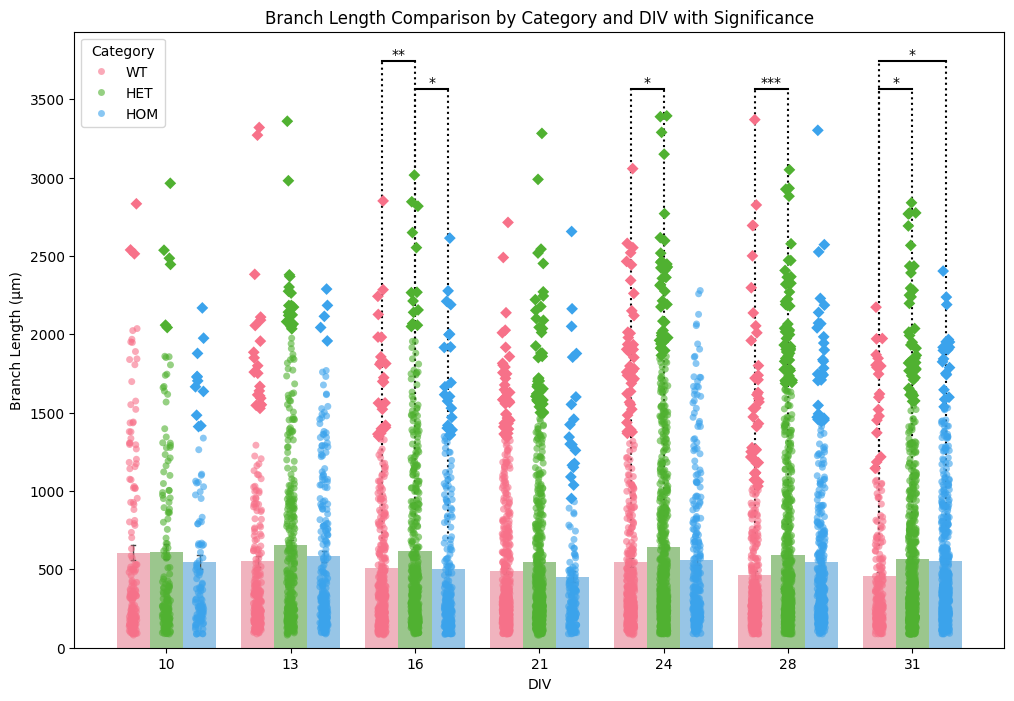

/tmp/ipykernel_96069/3425063789.py:176: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette,


Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.


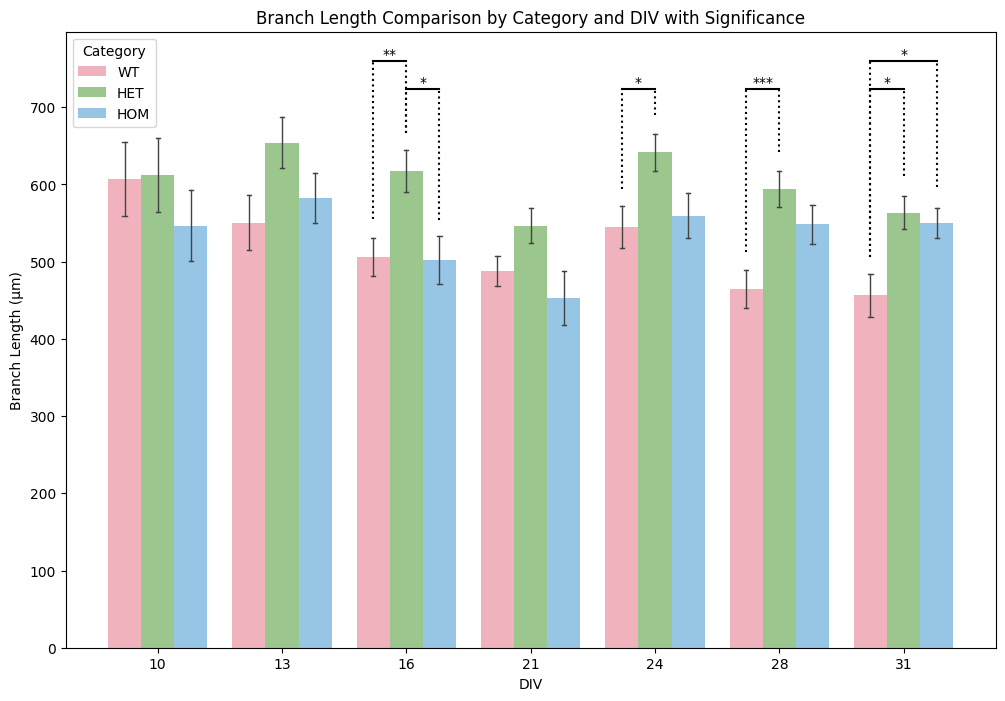

/tmp/ipykernel_96069/3425063789.py:168: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[~df['outlier']], jitter=True, dodge=True, marker='o', alpha=0.6, palette=palette, edgecolor='gray')
/tmp/ipykernel_96069/3425063789.py:168: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[~df['outlier']], jitter=True, dodge=True, marker='o', alpha=0.6, palette=palette, edgecolor='gray')
/tmp/ipykernel_96069/3425063789.py:170: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[df['outlier']], jitter=True, dodge=True, marker='D', palette=palette, edgecolor='red', size=6, ax=ax, legend=False)
/tmp/ipykernel_96069/3425063789.py:171: FutureWarning: 

The `errwidth` parameter is 

Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.
ANOVA for DIV 31: F-statistic=13.42711502594404, p-value=1.6949061989412864e-06
Comparing HET vs HOM at DIV 31: p-value=0.1346
Comparing HET vs WT at DIV 31: p-value=0.0004
Comparing HOM vs WT at DIV 31: p-value=0.0
ANOVA for DIV 16: F-statistic=19.321846131116963, p-value=5.937774994364306e-09
Comparing HET vs HOM at DIV 16: p-value=0.0
Comparing HET vs WT at DIV 16: p-value=0.0
Comparing HOM vs WT at DIV 16: p-value=0.8058
ANOVA for DIV 10: F-statistic=3.2792451378622607, p-value=0.03866646103389464
Comparing HET vs HOM at DIV 10: p-value=0.1111
Comparing HET vs WT at DIV 10: p-value=0.8664
Comparing HOM vs WT at DIV 10: p-value=0.0362
ANOVA for DIV 28: F-statistic=19.321682890735865, p-value=5.40361008592807e-09
Comparing HET vs HOM at DIV 28: p-value=0.3706
Comparing HET vs WT at DIV 28: p-value=0.0
Comparing HOM vs WT at DIV 28: p-value=0.0001
ANOV

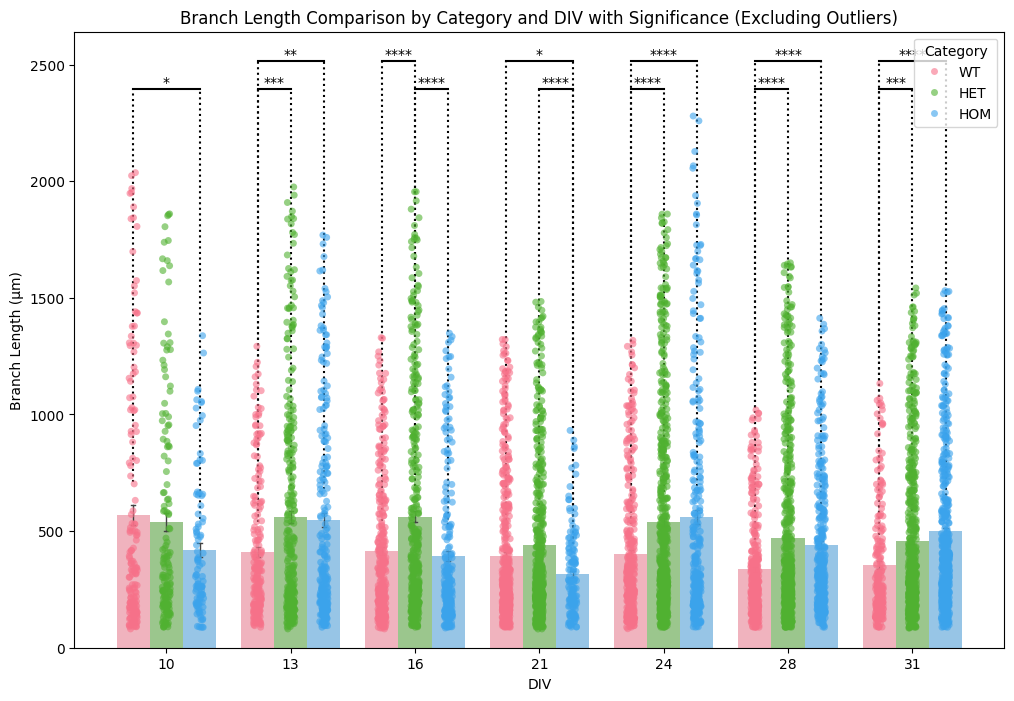

/tmp/ipykernel_96069/3425063789.py:176: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette,


Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.


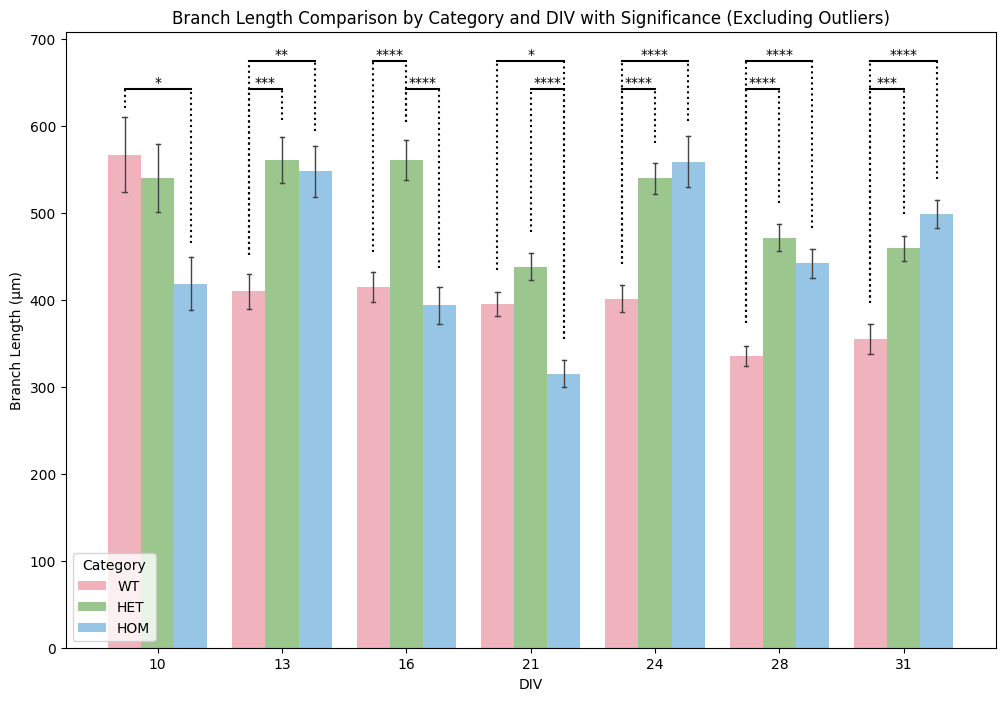

/tmp/ipykernel_96069/3425063789.py:168: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[~df['outlier']], jitter=True, dodge=True, marker='o', alpha=0.6, palette=palette, edgecolor='gray')
/tmp/ipykernel_96069/3425063789.py:171: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette, alpha=0.6, errorbar='se',


Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.
ANOVA for DIV 31: F-statistic=10.114682908927264, p-value=4.362552160473596e-05
Comparing HET vs HOM at DIV 31: p-value=0.0
Comparing HET vs WT at DIV 31: p-value=0.6957
Comparing HOM vs WT at DIV 31: p-value=0.0296
ANOVA for DIV 16: F-statistic=1.212543633552117, p-value=0.297871065607492
ANOVA for DIV 10: F-statistic=0.3098213489792952, p-value=0.7337447164053259
ANOVA for DIV 28: F-statistic=11.030928481155893, p-value=1.765289845741938e-05
Comparing HET vs HOM at DIV 28: p-value=0.8643
Comparing HET vs WT at DIV 28: p-value=0.0001
Comparing HOM vs WT at DIV 28: p-value=0.0001
ANOVA for DIV 13: F-statistic=1.2795076303281099, p-value=0.2787507820515679
ANOVA for DIV 24: F-statistic=1.014176993395882, p-value=0.3629751520524312
ANOVA for DIV 21: F-statistic=3.2841812901124374, p-value=0.037800909540046224
Comparing HET vs HOM at DIV 21: p-value=0.3575

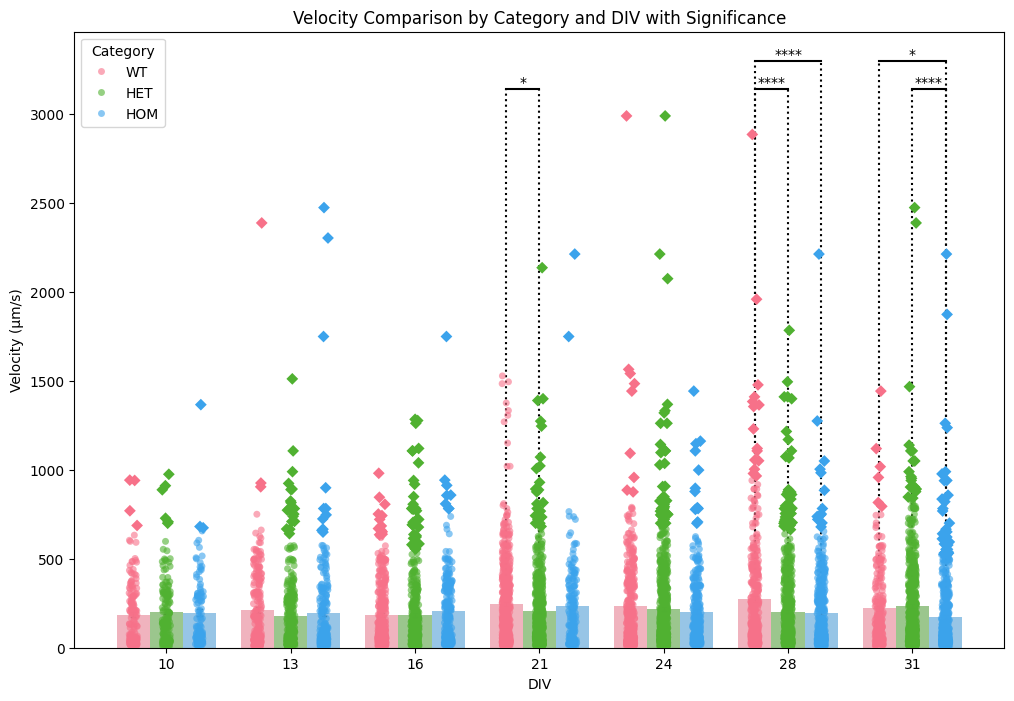

/tmp/ipykernel_96069/3425063789.py:176: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette,


Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.


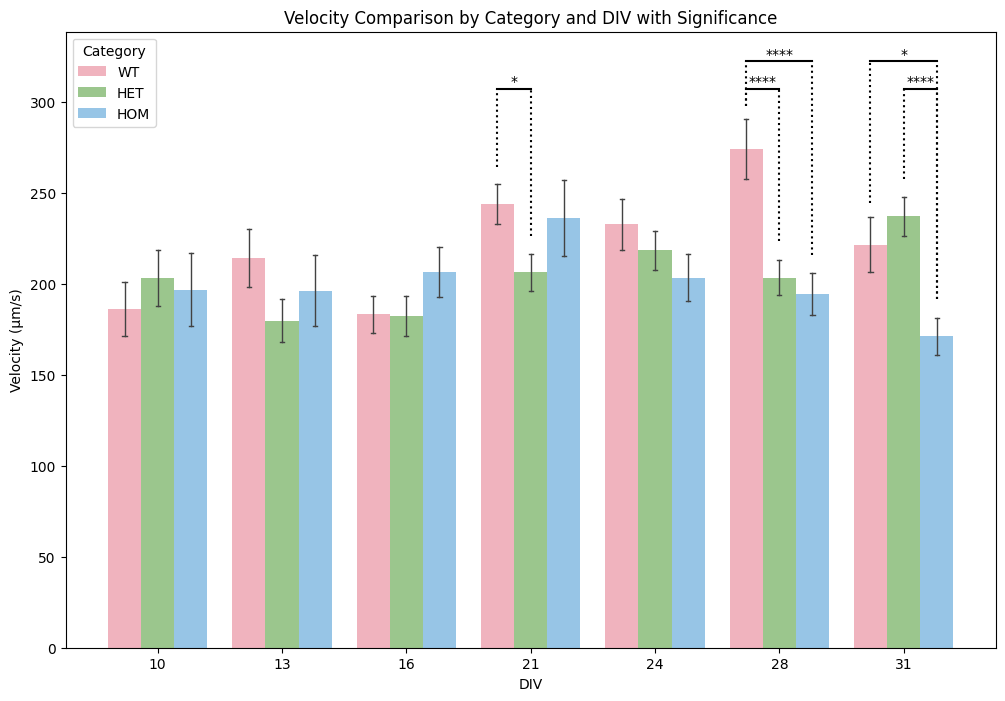

/tmp/ipykernel_96069/3425063789.py:168: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[~df['outlier']], jitter=True, dodge=True, marker='o', alpha=0.6, palette=palette, edgecolor='gray')
/tmp/ipykernel_96069/3425063789.py:168: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[~df['outlier']], jitter=True, dodge=True, marker='o', alpha=0.6, palette=palette, edgecolor='gray')
/tmp/ipykernel_96069/3425063789.py:170: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[df['outlier']], jitter=True, dodge=True, marker='D', palette=palette, edgecolor='red', size=6, ax=ax, legend=False)
/tmp/ipykernel_96069/3425063789.py:171: FutureWarning: 

The `errwidth` parameter is 

Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.
ANOVA for DIV 31: F-statistic=29.62444633912771, p-value=2.629682548414823e-13
Comparing HET vs HOM at DIV 31: p-value=0.0
Comparing HET vs WT at DIV 31: p-value=0.8283
Comparing HOM vs WT at DIV 31: p-value=0.0
ANOVA for DIV 16: F-statistic=11.460725607167573, p-value=1.2058179137119071e-05
Comparing HET vs HOM at DIV 16: p-value=0.0
Comparing HET vs WT at DIV 16: p-value=0.0034
Comparing HOM vs WT at DIV 16: p-value=0.2787
ANOVA for DIV 10: F-statistic=0.15487278136482, p-value=0.8565743428931034
ANOVA for DIV 28: F-statistic=20.372301822157773, p-value=1.9294564049110385e-09
Comparing HET vs HOM at DIV 28: p-value=0.6456
Comparing HET vs WT at DIV 28: p-value=0.0
Comparing HOM vs WT at DIV 28: p-value=0.0
ANOVA for DIV 13: F-statistic=10.783153802492711, p-value=2.4135664072788074e-05
Comparing HET vs HOM at DIV 13: p-value=0.602
Comparing HET vs WT 

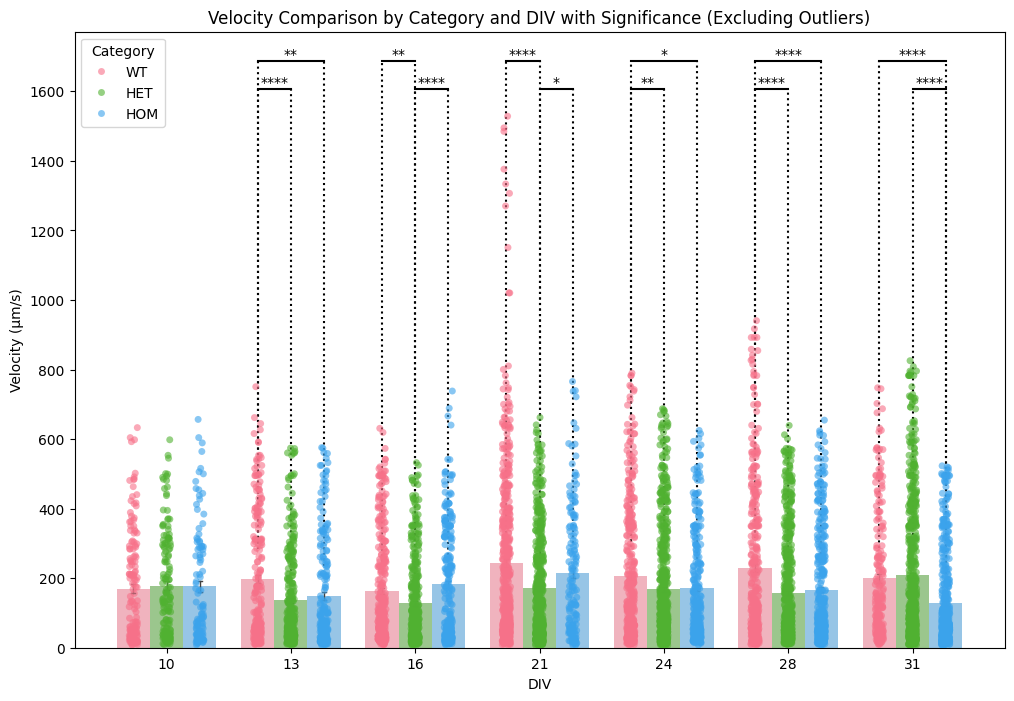

/tmp/ipykernel_96069/3425063789.py:176: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette,


Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.


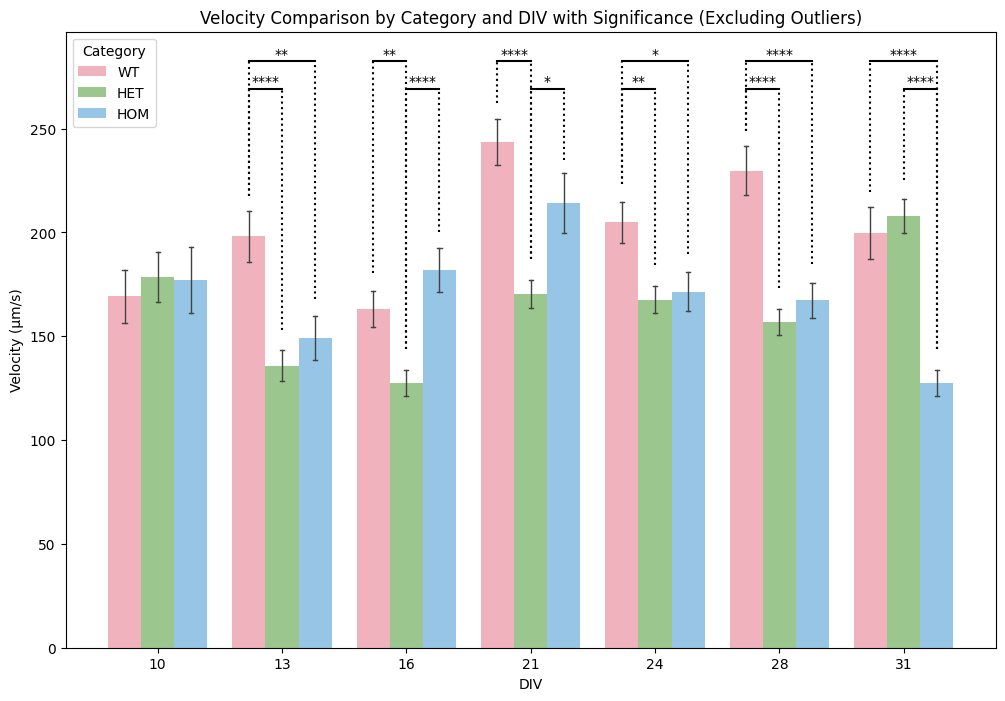

/tmp/ipykernel_96069/3425063789.py:168: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[~df['outlier']], jitter=True, dodge=True, marker='o', alpha=0.6, palette=palette, edgecolor='gray')
/tmp/ipykernel_96069/3425063789.py:171: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette, alpha=0.6, errorbar='se',


Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.
ANOVA for DIV 31: F-statistic=2.8127720305649846, p-value=0.06115127072307866
ANOVA for DIV 16: F-statistic=2.5611687801192917, p-value=0.07865686607866125
ANOVA for DIV 10: F-statistic=0.0020340653533529457, p-value=0.9979680276012808
ANOVA for DIV 28: F-statistic=4.61565692541995, p-value=0.010443855904340688
Comparing HET vs HOM at DIV 28: p-value=0.0106
Comparing HET vs WT at DIV 28: p-value=0.9764
Comparing HOM vs WT at DIV 28: p-value=0.0383
ANOVA for DIV 24: F-statistic=4.155478531580803, p-value=0.01635688595792047
Comparing HET vs HOM at DIV 24: p-value=0.5982
Comparing HET vs WT at DIV 24: p-value=0.0116
Comparing HOM vs WT at DIV 24: p-value=0.2805
ANOVA for DIV 13: F-statistic=0.8091963935607684, p-value=0.44620141691051773
ANOVA for DIV 21: F-statistic=5.22617651694648, p-value=0.0057858026144308634
Comparing HET vs HOM at DIV 21: p-value=0

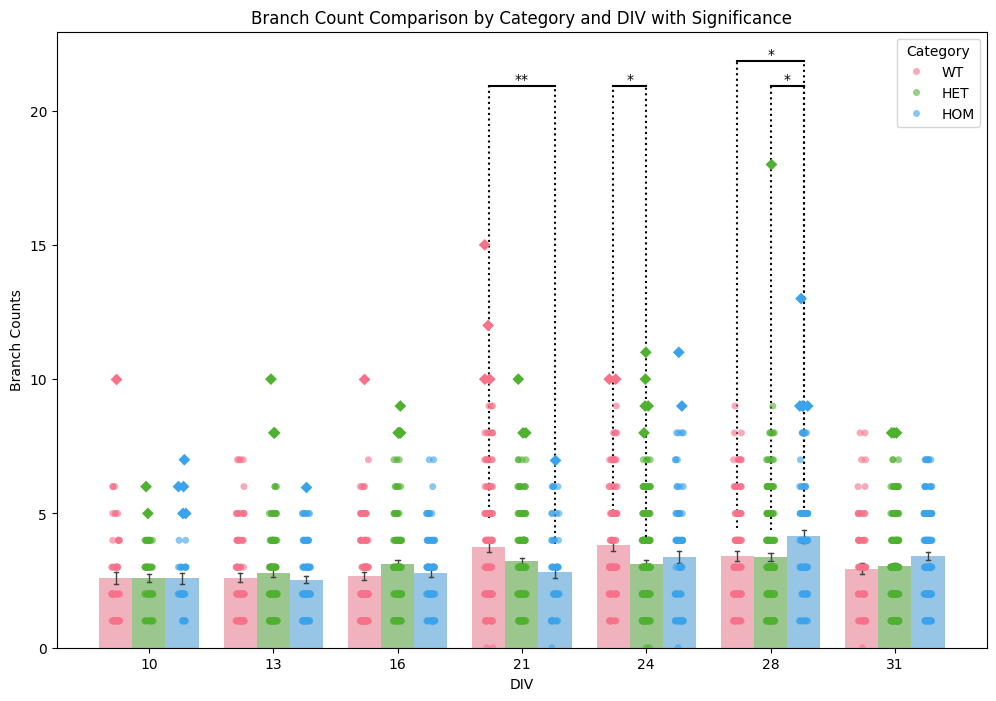

/tmp/ipykernel_96069/3425063789.py:176: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette,


Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.


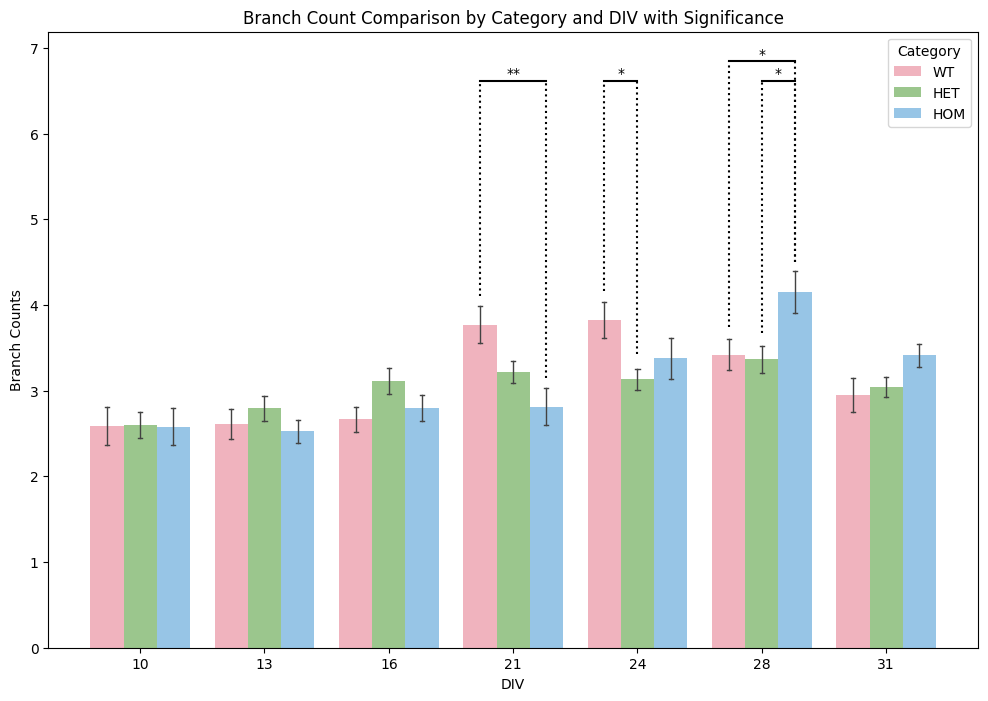

/tmp/ipykernel_96069/3425063789.py:168: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[~df['outlier']], jitter=True, dodge=True, marker='o', alpha=0.6, palette=palette, edgecolor='gray')
/tmp/ipykernel_96069/3425063789.py:168: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[~df['outlier']], jitter=True, dodge=True, marker='o', alpha=0.6, palette=palette, edgecolor='gray')
/tmp/ipykernel_96069/3425063789.py:170: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[df['outlier']], jitter=True, dodge=True, marker='D', palette=palette, edgecolor='red', size=6, ax=ax, legend=False)
/tmp/ipykernel_96069/3425063789.py:171: FutureWarning: 

The `errwidth` parameter is 

Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.
ANOVA for DIV 31: F-statistic=3.7119557297545667, p-value=0.025227177046575948
Comparing HET vs HOM at DIV 31: p-value=0.0324
Comparing HET vs WT at DIV 31: p-value=0.9948
Comparing HOM vs WT at DIV 31: p-value=0.1031
ANOVA for DIV 16: F-statistic=1.4416818888430314, p-value=0.23795093941826675
ANOVA for DIV 10: F-statistic=1.0955828547806916, p-value=0.33695299087919395
ANOVA for DIV 28: F-statistic=2.4633264821485628, p-value=0.08649940301131169
ANOVA for DIV 24: F-statistic=5.593528558455236, p-value=0.0040243345159107075
Comparing HET vs HOM at DIV 24: p-value=0.5451
Comparing HET vs WT at DIV 24: p-value=0.0026
Comparing HOM vs WT at DIV 24: p-value=0.1611
ANOVA for DIV 13: F-statistic=0.3080842448747369, p-value=0.7350927971683413
ANOVA for DIV 21: F-statistic=4.3479642933043, p-value=0.013628864783710802
Comparing HET vs HOM at DIV 21: p-value=0.

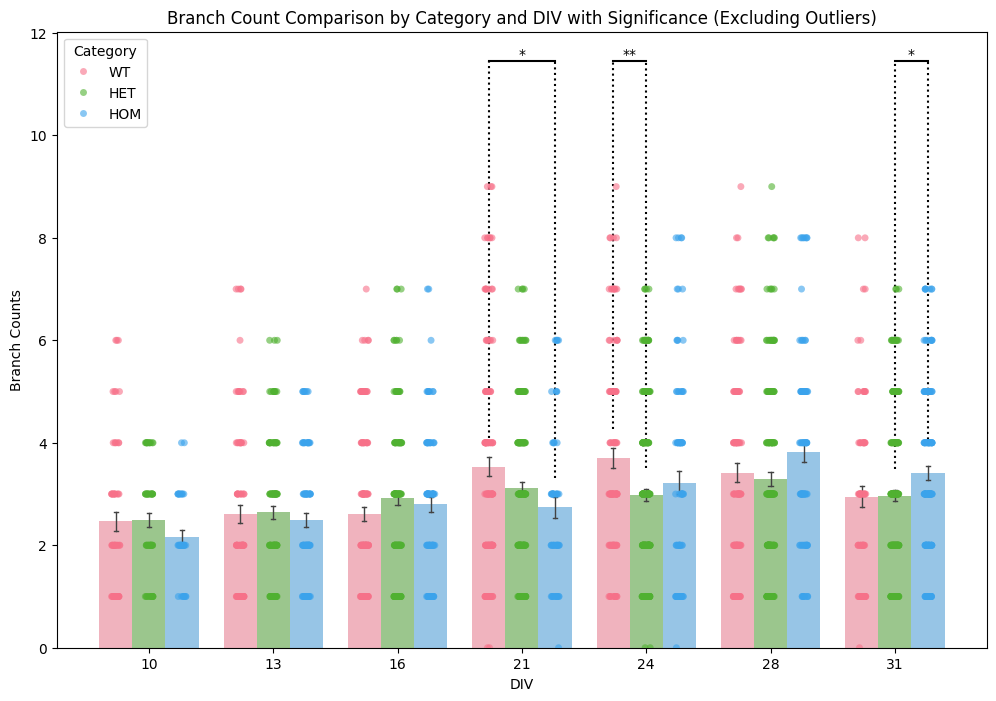

/tmp/ipykernel_96069/3425063789.py:176: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette,


Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.


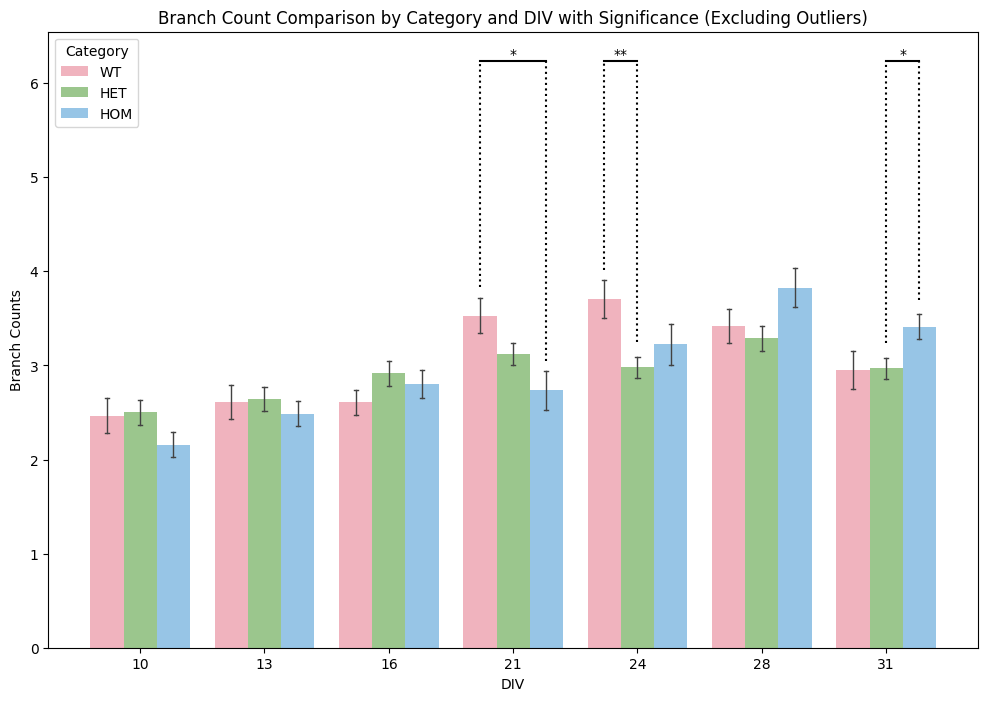

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def test_significance(data, dep_var, group_by, print_stats=False, method='auto'):
    """
    Test significance between groups using t-tests or ANOVA.
    
    Parameters:
    - data: DataFrame containing the data.
    - dep_var: The dependent variable column name.
    - group_by: The column name to group by.
    - print_stats: Whether to print statistical results.
    - method: 'ttest' for t-tests, 'anova' for ANOVA, 'auto' to decide based on the number of categories.
    
    Returns:
    - pairs: List of compared pairs (for t-tests or Tukey's HSD after ANOVA).
    - p_values: List of p-values for each comparison.
    """
    divs = data['DIV'].unique()
    pairs, p_values = [], []

    for div in divs:
        data_div = data[data['DIV'] == div]
        categories = data_div[group_by].unique()
        
        if method == 'ttest' or (method == 'auto' and len(categories) == 2):
            pairs_div = [(cat1, cat2) for i, cat1 in enumerate(categories) for cat2 in categories[i+1:]]
            
            for (cat1, cat2) in pairs_div:
                data1 = data_div[data_div[group_by] == cat1][dep_var].dropna().astype(float)
                data2 = data_div[data_div[group_by] == cat2][dep_var].dropna().astype(float)
                t_stat, p_val = stats.ttest_ind(data1, data2)
                pairs.append((div, cat1, cat2))
                p_values.append(p_val)
                if print_stats: 
                    print(f'Comparing {cat1} vs {cat2} at DIV {div}: t-statistic={t_stat}, p-value={p_val}')
        
        elif method == 'anova' or (method == 'auto' and len(categories) > 2):
            data_groups = [data_div[data_div[group_by] == cat][dep_var].dropna().astype(float) for cat in categories]
            f_stat, p_val = stats.f_oneway(*data_groups)
            if print_stats: print(f'ANOVA for DIV {div}: F-statistic={f_stat}, p-value={p_val}')
            
            if p_val < 0.05:  # Perform post-hoc test if ANOVA is significant
                # Ensure the data is clean and properly typed
                cleaned_data = data_div.dropna(subset=[dep_var, group_by])
                endog = cleaned_data[dep_var].astype(float)
                groups = cleaned_data[group_by].astype(str)
                
                tukey_result = pairwise_tukeyhsd(endog=endog, groups=groups, alpha=0.05)
                for result in tukey_result.summary().data[1:]:
                    cat1, cat2, _, p_val, _, _, _ = result
                    pairs.append((div, cat1, cat2))
                    p_values.append(p_val)
                    if print_stats:
                        print(f'Comparing {cat1} vs {cat2} at DIV {div}: p-value={p_val}')
    
    return pairs, p_values

def identify_outliers(series):
    """Identify outliers using Tukey's method."""
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)

def add_significance_annotations(ax, data, dep_var, group_by, print_stats=False, bar_width=0.8/3, stagger=5):
    """Add significance annotations to the plot."""
    print("Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.")
    
    pairs, p_values = test_significance(data, dep_var, group_by, print_stats=print_stats)
    divs = data['DIV'].unique()
    annotations_per_div = {div: 0 for div in divs}

    # Get the y range of the plot
    y_max = ax.get_ylim()[1]

    for (div, cat1, cat2), p_val in zip(pairs, p_values):
        data_div = data[data['DIV'] == div]
        data1 = data_div[data_div[group_by] == cat1][dep_var].dropna().astype(float)
        data2 = data_div[data_div[group_by] == cat2][dep_var].dropna().astype(float)
        if p_val <= 0.05:
            stars = ""
            if p_val <= 0.0001:
                stars = "****"
            elif p_val <= 0.001:
                stars = "***"
            elif p_val <= 0.01:
                stars = "**"
            elif p_val <= 0.05:
                stars = "*"
            
            if stars:
                #divs = divs.sort()
                sorted_divs = sorted(divs)
                x_ind = list(sorted_divs).index(div)
                categories = data[data['DIV'] == div][group_by].unique()
                cat1_index = list(categories).index(cat1)
                cat2_index = list(categories).index(cat2)

                div_pos = x_ind
                div_width = len(categories) * bar_width
                div_start = div_pos - div_width / 2
                bar1_pos = div_start + (cat1_index) * bar_width + bar_width / 2
                bar2_pos = div_start + (cat2_index) * bar_width + bar_width / 2
                x1 = bar1_pos
                x2 = bar2_pos
                
                y_max_sem1 = stats.sem(data1)   #get the y_min values for vertical lines
                y_max_sem2 = stats.sem(data2)
                assert y_max_sem1 > 0, f"y_max_sem1={y_max_sem1}"
                assert y_max_sem2 > 0, f"y_max_sem2={y_max_sem2}"
                
                y_mean1 = data1.mean()
                y_mean2 = data2.mean()
                y_min1 = y_mean1 + y_max_sem1/2 + y_max*0.05
                y_min2 = y_mean2 + y_max_sem2/2 + y_max*0.05
                
                stagger = y_max * 0.05 #add stagger to y_min values for vertical coords
                stagger_offset = annotations_per_div[div] * stagger
                y = y_max + 1 + stagger_offset
                h, col = 1, 'k'
                assert y_min1<y+h, f"y_min1={y_min1}, y+h={y+h}"
                assert y_min2<y+h, f"y_min2={y_min2}, y+h={y+h}"
                
                ax.plot([x1, x2], [y + h, y + h], lw=1.5, c=col) #horizontal line
                ax.plot([x1, x1], [y_min1, y + h], lw=1.5, ls='dotted', c=col) #vertical line
                ax.plot([x2, x2], [y_min2, y + h], lw=1.5, ls='dotted', c=col) #vertical line
                ax.text((x1 + x2) / 2, y + h, stars, ha='center', va='bottom', color=col) #stars

                annotations_per_div[div] += 1

                if print_stats: print(f'Significant difference between {cat1} and {cat2} at DIV {div}: p-value={p_val}, stars={stars}')

                #break

def plot_with_significance(data, y, title, ylabel, scatter=True, cat_order=None, print_stats=False, div_width=.8, exclude_outliers=False):
    """Plot data with significance annotations and outliers as diamonds."""
    df = data.copy()
    
    plt.figure(figsize=(12, 8))
    cats = df['category'].unique()
    if cat_order is not None: cats = [cat for cat in cat_order if cat in cats]
    df = df.sort_values(by='category', key=lambda x: x.map({cat: i for i, cat in enumerate(cats)}))
    
    sorted_data = df[df['category'].isin(cats)].copy()
    sorted_data['category'] = pd.Categorical(sorted_data['category'], categories=cats, ordered=True)    
    palette = sns.color_palette("husl", len(cats))
    
    df['outlier'] = df.groupby(['DIV', 'category'])[y].transform(identify_outliers)

    if exclude_outliers: 
        sorted_data = sorted_data[~df['outlier']]
        title += ' (Excluding Outliers)'
    
    if scatter:
        ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[~df['outlier']], jitter=True, dodge=True, marker='o', alpha=0.6, palette=palette, edgecolor='gray')
        # Highlight outliers
        ax = sns.stripplot(x='DIV', y=y, hue='category', data=sorted_data[df['outlier']], jitter=True, dodge=True, marker='D', palette=palette, edgecolor='red', size=6, ax=ax, legend=False)
        ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette, alpha=0.6, errorbar='se', 
                         capsize=0.1, 
                         errwidth=1, 
                         dodge=True, ax=ax, width=div_width)
    else:
        ax = sns.barplot(x='DIV', y=y, hue='category', data=sorted_data, palette=palette, 
                        capsize=0.1,
                        errwidth=1, 
                        alpha=0.6, errorbar='se', width=div_width)
    
    bar_width = div_width / len(cats)
    add_significance_annotations(ax, sorted_data, y, 'category', print_stats=print_stats, bar_width=bar_width)
    
    # bar_width = div_width / len(cats)
    # add_significance_annotations(ax, sorted_data, y, 'category', print_stats=print_stats, bar_width=bar_width)
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('DIV')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:3], labels[0:3], title='Category')
    plt.show()

    return ax

# Example usage
# data = pd.read_csv('your_data.csv')
# plot_with_significance(data, 'dependent_variable', 'Plot Title', 'Y-axis Label', scatter=True, cat_order=['WT', 'KO', 'TG'])

# Plot data with significance annotations
save_svgs = False
cat_order=['WT', 'HET', 'HOM']

#length
ax = plot_with_significance(exploded_data_by_branch, 'length', 'Branch Length Comparison by Category and DIV with Significance', 'Branch Length (µm)', scatter=True, print_stats=True, cat_order=cat_order)
if save_svgs: ax.get_figure().savefig('branch_length_comparison.svg', format='svg')
ax = plot_with_significance(exploded_data_by_branch, 'length', 'Branch Length Comparison by Category and DIV with Significance', 'Branch Length (µm)', scatter=False, print_stats=False, cat_order=cat_order)
if save_svgs: ax.get_figure().savefig('branch_length_comparison.svg', format='svg')
ax = plot_with_significance(exploded_data_by_branch, 'length', 'Branch Length Comparison by Category and DIV with Significance', 'Branch Length (µm)', scatter=True, print_stats=True, cat_order=cat_order, exclude_outliers=True)
if save_svgs: ax.get_figure().savefig('branch_length_comparison.svg', format='svg')
ax = plot_with_significance(exploded_data_by_branch, 'length', 'Branch Length Comparison by Category and DIV with Significance', 'Branch Length (µm)', scatter=False, print_stats=False, cat_order=cat_order, exclude_outliers=True)
if save_svgs: ax.get_figure().savefig('branch_length_comparison.svg', format='svg')


#velocity
ax = plot_with_significance(exploded_data_by_branch, 'velocity', 'Velocity Comparison by Category and DIV with Significance', 'Velocity (µm/s)', scatter=True, print_stats=True, cat_order=cat_order)
if save_svgs: ax.get_figure().savefig('velocity_comparison_noscatter.svg', format='svg')
ax = plot_with_significance(exploded_data_by_branch, 'velocity', 'Velocity Comparison by Category and DIV with Significance', 'Velocity (µm/s)', scatter=False, print_stats=False, cat_order=cat_order)
if save_svgs: ax.get_figure().savefig('velocity_comparison_noscatter.svg', format='svg')
ax = plot_with_significance(exploded_data_by_branch, 'velocity', 'Velocity Comparison by Category and DIV with Significance', 'Velocity (µm/s)', scatter=True, print_stats=True, cat_order=cat_order, exclude_outliers=True)
if save_svgs: ax.get_figure().savefig('velocity_comparison_noscatter.svg', format='svg')
ax = plot_with_significance(exploded_data_by_branch, 'velocity', 'Velocity Comparison by Category and DIV with Significance', 'Velocity (µm/s)', scatter=False, print_stats=False, cat_order=cat_order, exclude_outliers=True)
if save_svgs: ax.get_figure().savefig('velocity_comparison_noscatter.svg', format='svg')

#branch counts
ax = plot_with_significance(exploded_data_by_unit, 'branch_counts', 'Branch Count Comparison by Category and DIV with Significance', 'Branch Counts', scatter=True, print_stats=True, cat_order=cat_order)
if save_svgs: ax.get_figure().savefig('branch_count_comparison_noscatter.svg', format='svg')
ax = plot_with_significance(exploded_data_by_unit, 'branch_counts', 'Branch Count Comparison by Category and DIV with Significance', 'Branch Counts', scatter=False, print_stats=False, cat_order=cat_order)
if save_svgs: ax.get_figure().savefig('branch_count_comparison_noscatter.svg', format='svg')
ax = plot_with_significance(exploded_data_by_unit, 'branch_counts', 'Branch Count Comparison by Category and DIV with Significance', 'Branch Counts', scatter=True, print_stats=True, cat_order=cat_order, exclude_outliers=True)
if save_svgs: ax.get_figure().savefig('branch_count_comparison_noscatter.svg', format='svg')
ax = plot_with_significance(exploded_data_by_unit, 'branch_counts', 'Branch Count Comparison by Category and DIV with Significance', 'Branch Counts', scatter=False, print_stats=False, cat_order=cat_order, exclude_outliers=True)
if save_svgs: ax.get_figure().savefig('branch_count_comparison_noscatter.svg', format='svg')


In [ ]:
# Plot data with significance annotations
save_svgs = False
ax = plot_with_significance(final_valid_data, 'Velocity', 'Branch Velocity Comparison by Category and DIV with Significance', 'Branch Velocity (µm/ms)', scatter=True, print_stats=True)
if save_svgs: ax.get_figure().savefig('branch_velocity_comparison.svg', format='svg') 
ax = plot_with_significance(final_valid_data, 'Velocity', 'Branch Velocity Comparison by Category and DIV with Significance', 'Branch Velocity (µm/ms)', scatter=False, print_stats=False)
if save_svgs: ax.get_figure().savefig('branch_velocity_comparison_noscatter.svg', format='svg') 

NameError: name 'final_valid_data' is not defined

In [ ]:
# Plot data with significance annotations
save_svgs = False
ax = plot_with_significance(final_valid_data, 'Velocity', 'Branch Velocity Comparison by Category and DIV with Significance', 'Branch Velocity (µm/ms)', scatter=True, print_stats=True)
if save_svgs: ax.get_figure().savefig('branch_velocity_comparison.svg', format='svg') 
ax = plot_with_significance(final_valid_data, 'Velocity', 'Branch Velocity Comparison by Category and DIV with Significance', 'Branch Velocity (µm/ms)', scatter=False, print_stats=False)
if save_svgs: ax.get_figure().savefig('branch_velocity_comparison_noscatter.svg', format='svg') 